# Cleaning ZomatoData csv  and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# reading the data extracted after web scrapping 
df = pd.read_csv("zomato_extracted_data_csv/zomato_extracted_data.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 23 columns):
restaurant_link           6147 non-null object
restaurant_ID             6147 non-null int64
restaurant_name           6147 non-null object
locality                  6147 non-null object
restaurant_category       6142 non-null object
zomato_gold               347 non-null object
discounts                 738 non-null object
photos_taken              6147 non-null int64
rating                    5328 non-null float64
votes                     5310 non-null float64
cuisines                  6147 non-null object
approx_cost_for_2         6147 non-null int64
opening_timings           6143 non-null object
address                   6041 non-null object
latitude                  5682 non-null float64
longitude                 5682 non-null float64
more_info                 6147 non-null object
featured_in               761 non-null object
known_for                 290 non-null object
mos

In [4]:
df.head(3)

,restaurant_link,restaurant_ID,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
0,https://www.zomato.com/bangalore/abs-absolute-...,56618,AB's - Absolute Barbecues,Marathahalli,Casual Dining,zomato gold,NaN,4665,4.8,14700.0,...,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",12.949798,77.699308,"['Wheelchair Accessible', 'Full Bar Available'...","['Great Buffets', ""Bengaluru's Finest""]",serving varieties of meat,"['5/5', 'Fish', 'Paan Ice Cream', 'Sea Food', ...","['4/5', 'Friendly Staff', 'Courteous Staff', '...","['4/5', 'Live Grill', 'Lovely Ambience', 'Decor']","(['2019-12-03 12:40:39', 'positive', 'NA', 'Go..."
1,https://www.zomato.com/bangalore/uru-brewpark-...,19122613,URU Brewpark,JP Nagar,Microbrewery,NaN,NaN,776,4.3,1421.0,...,"Maratt Estate, 4th Phase, Near Maratt Pimento,...",12.905891,77.601274,"['Home Delivery', 'Full Bar Available', 'Night...",['Sneak Peek Bengaluru'],NaN,"['4/5', 'Pizza', 'Nachos', 'Beer', 'Tiramisu',...","['4/5', 'Courteous Staff', 'Friendly Staff', '...","['4/5', 'Decor']","(['2020-01-08 18:17:08', 'positive', 'NA', 'Th..."
2,https://www.zomato.com/bangalore/the-big-barbe...,19203051,The Big Barbeque,Marathahalli,Casual Dining,NaN,NaN,609,4.7,1744.0,...,"88, 2nd Floor, Outer Ring Road, Near More Supe...",12.948399,77.698877,"['Full Bar Available', 'Free Parking', 'Live M...","['Sneak Peek Bengaluru', 'Corporate Favorites'...",NaN,NaN,NaN,NaN,"(['2020-01-17 08:23:30', 'NA', 'NA', ""Food : 5..."


In [5]:
df.shape

(6147, 23)

In [6]:
df = df.drop_duplicates("restaurant_ID",keep='first')

In [7]:
df.shape

(5637, 23)

In [8]:
def listToTuple(reviews):
    if isinstance(reviews,str):
        reviewList = ast.literal_eval(reviews)        
        if len(reviewList)>0 and isinstance(reviewList,list):
            tup = (reviewList[0],reviewList[1:])
            return tuple(tup)
    else:
        return np.nan


In [9]:
df["most_liked_Food"] = df["most_liked_Food"].apply(listToTuple)    
df["most_liked_Service"] = df["most_liked_Service"].apply(listToTuple)
df["most_liked_Look & Feel"] = df["most_liked_Look & Feel"].apply(listToTuple)

In [10]:
df["most_liked_Food"]

0       (5/5, [Fish, Paan Ice Cream, Sea Food, Crispy ...
1       (4/5, [Pizza, Nachos, Beer, Tiramisu, Chicken ...
2                                                     NaN
3       (5/5, [Cocktails, Mocktails, Pizza, Nachos, Cr...
4                                                     NaN
                              ...                        
6142                                                  NaN
6143                                                  NaN
6144                                                  NaN
6145                                                  NaN
6146                                                  NaN
Name: most_liked_Food, Length: 5637, dtype: object

In [11]:
def formatTime(timing):
    if isinstance(timing,str):
        if timing is np.nan or timing == "[]":
            return "NA"
        timings = ast.literal_eval(timing)
        newtime = ['12:00' if timed == '12noon' else '00:00' if timed == "12midnight" else timed if ("24" in timed) else datetime.strptime(timed,'%I%p').strftime('%H:%M') if len(timed)<5 else datetime.strptime(timed,'%I:%M%p').strftime('%H:%M') for timed in timings]
        return newtime

In [12]:
df["opening_timings"] = df["opening_timings"].apply(formatTime) #standardising timing format

In [13]:
df.head(3)

,restaurant_link,restaurant_ID,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
0,https://www.zomato.com/bangalore/abs-absolute-...,56618,AB's - Absolute Barbecues,Marathahalli,Casual Dining,zomato gold,NaN,4665,4.8,14700.0,...,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",12.949798,77.699308,"['Wheelchair Accessible', 'Full Bar Available'...","['Great Buffets', ""Bengaluru's Finest""]",serving varieties of meat,"(5/5, [Fish, Paan Ice Cream, Sea Food, Crispy ...","(4/5, [Friendly Staff, Courteous Staff, Courte...","(4/5, [Live Grill, Lovely Ambience, Decor])","(['2019-12-03 12:40:39', 'positive', 'NA', 'Go..."
1,https://www.zomato.com/bangalore/uru-brewpark-...,19122613,URU Brewpark,JP Nagar,Microbrewery,NaN,NaN,776,4.3,1421.0,...,"Maratt Estate, 4th Phase, Near Maratt Pimento,...",12.905891,77.601274,"['Home Delivery', 'Full Bar Available', 'Night...",['Sneak Peek Bengaluru'],NaN,"(4/5, [Pizza, Nachos, Beer, Tiramisu, Chicken ...","(4/5, [Courteous Staff, Friendly Staff, Friend...","(4/5, [Decor])","(['2020-01-08 18:17:08', 'positive', 'NA', 'Th..."
2,https://www.zomato.com/bangalore/the-big-barbe...,19203051,The Big Barbeque,Marathahalli,Casual Dining,NaN,NaN,609,4.7,1744.0,...,"88, 2nd Floor, Outer Ring Road, Near More Supe...",12.948399,77.698877,"['Full Bar Available', 'Free Parking', 'Live M...","['Sneak Peek Bengaluru', 'Corporate Favorites'...",NaN,NaN,NaN,NaN,"(['2020-01-17 08:23:30', 'NA', 'NA', ""Food : 5..."


In [14]:
df['cuisines'] = [x.split(",") if isinstance(x,str) else x for x in df["cuisines"]]

In [15]:
#numeric conversion
df["zomato_gold"] = df["zomato_gold"].apply(lambda x: 1 if x == 'zomato gold' else 0)

In [16]:
#numeric conversion
df["discounts"] = df["discounts"].apply(lambda x: 1 if x is not np.nan else 0)

In [17]:
#writing the new clean data
df.to_csv("zomato_clean_data_csv/zomato_clean_data"+".csv",index=False)

In [18]:
#shuffling df

from sklearn.utils import shuffle
df = shuffle(df)

In [19]:
df.index = df["restaurant_ID"]
df.drop(["restaurant_ID"],axis=1,inplace=True)

In [20]:
df.shape

(5637, 22)

In [21]:
df.head(3)

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18779047,https://www.zomato.com/bangalore/ammas-pastrie...,Amma's Pastries,JP Nagar,Dessert Parlor,0,0,4,3.7,21.0,[Desserts],...,"15, Ground Floor, 24th Main Road, JP Nagar, Ba...",12.896474,77.586202,"['Indoor Seating', 'Desserts and Bakes']",NaN,NaN,NaN,NaN,NaN,"(['2019-05-20 21:52:52', 'NA', 'NA', ""Tasted t..."
57138,https://www.zomato.com/bangalore/asia-alive-do...,Asia Alive - DoubleTree Suites By Hilton,Sarjapur Road,Fine Dining,1,0,667,4.1,308.0,"[Continental, Thai, Malaysian, Burmese, Ko...",...,"DoubleTree Suites by Hilton, Iblur Gate, Outer...",12.920216,77.665705,"['Breakfast', 'Wheelchair Accessible', 'Full B...",NaN,NaN,"(5/5, [Salad, Fish, Cocktails, Wine, Gulab Jam...","(4/5, [Friendly Staff])","(4/5, [Live Music, Decor])","(['2019-12-29 20:22:45', 'positive', 'NA', 'We..."
19265762,https://www.zomato.com/bangalore/dolphin-hotel...,Dolphin Hotel,Rajajinagar,Quick Bites,0,0,0,3.4,6.0,"[Andhra, Mughlai, Mangalorean]",...,"75/166, Karekalu, Kamakshipalya, Rajajinagar, ...",12.989147,77.532875,"['Home Delivery', 'Indoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-12-07 19:25:04', 'positive', 'NA', '']..."


# Some Interesting Insights#

<div class="span5 alert alert-info">
<b>    
1. Different Restaurant categories and their counts
</b>    
</div>

In [22]:
plt.style.use('ggplot')

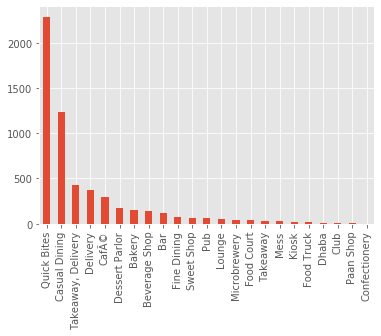

In [23]:
df["restaurant_category"].value_counts().plot.bar()

**Quick bites and Casual dining are the most common of all restaurant categories**

** **

<div class="span5 alert alert-info">
<b>
2. Most Unique cuisines
</b>    
</div>   

In [24]:
df['cuisines']

restaurant_ID
18779047                                           [Desserts]
57138       [Continental,  Thai,  Malaysian,  Burmese,  Ko...
19265762                     [Andhra,  Mughlai,  Mangalorean]
19185928    [Pizza,  Sandwich,  Wraps,  Chinese,  Ice Crea...
19196635                                             [Bakery]
                                  ...                        
19292734                 [North Indian,  Chinese,  Fast Food]
18932586    [North Indian,  Chinese,  Kebab,  Biryani,  De...
52097                                       [Cafe,  Desserts]
18716061           [Cafe,  Italian,  Continental,  Beverages]
19057947                    [Andhra,  North Indian,  Chinese]
Name: cuisines, Length: 5637, dtype: object

In [25]:
cuisines_series = df['cuisines'].apply(pd.Series).stack().reset_index(drop=True)

In [26]:
cuisines_series.value_counts(ascending = True)

Nepalese            1
 Iranian            1
 Peruvian           1
Singaporean         1
German              1
                 ... 
 Fast Food        616
South Indian      730
 North Indian    1098
North Indian     1537
 Chinese         1694
Length: 175, dtype: int64

**Nepalese, Iranian are some of rare cuisines**

** **

<div class="span5 alert alert-info">
<b>    
3. Which locality has maximum restaurants which are in featured in 'newly opened'?
</b>    
</div>     

In [27]:
dffeatured = df.dropna(subset=['featured_in'])

In [28]:
dffeatured['featured_in']

restaurant_ID
51899                       ['Super Seafood', 'Best of Gold']
52212                 ['Great Buffets', "Bengaluru's Finest"]
18493290                                  ['Kickass Burgers']
50406                                   ['Legendary Outlets']
18794071      ['Food Hygiene Rated Restaurants in Bengaluru']
                                  ...                        
60803                                  ["Bengaluru's Finest"]
18580202    ['Food Hygiene Rated Restaurants in Bengaluru'...
19244536                                 ['Get flat 25% Off']
18932586        ['Corporate Favorites', 'Flavours of Punjab']
52097                    ['Sweet Tooth', 'Comfort In A Cup!']
Name: featured_in, Length: 739, dtype: object

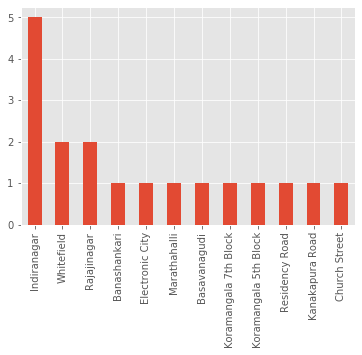

In [29]:
dffeatured["locality"][dffeatured['featured_in'].apply(lambda x: 'Newly Opened' in x)].value_counts().plot.bar()

**Indiranagar has the most restaurants featured under 'newly opened'.**  

** **  

<div class="span5 alert alert-info">
<b>    
4. Average cost of 2 for a restaurant category
</b>    
</div>     

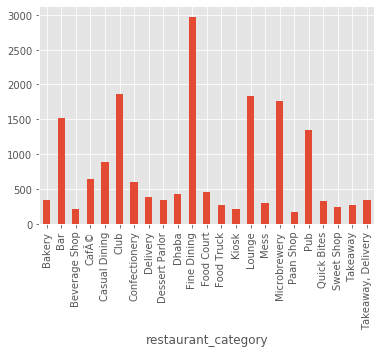

In [30]:
df.groupby("restaurant_category")['approx_cost_for_2'].mean().plot.bar()

**Fine dining category has the highest cost for 2 people.**

** **

<div class="span5 alert alert-info">
<b>    
5. Average restaurant rating in locality
</b>    
</div>     

In [34]:
df['rating'] = df['rating'].astype(float)

In [35]:
dfmeanratings = df.groupby("locality")['rating'].mean()
dfmeanratings.sort_values(ascending=False)

locality
Sankey Road              4.225000
Lavelle Road             4.143333
Church Street            4.095833
Race Course Road         4.084211
Koramangala 5th Block    4.061290
                           ...   
CV Raman Nagar           3.526087
Ejipura                  3.520000
Uttarahalli              3.515385
Bommanahalli             3.500000
City Market              3.476923
Name: rating, Length: 96, dtype: float64

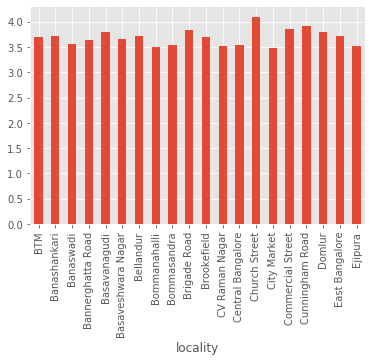

In [36]:
#Plotting avg rating of first 20 localities
dfmeanratingsTop20 = dfmeanratings[0:20]
dfmeanratingsTop20.plot.bar()

**Looking at the plot we can say the average ratings of the restaurants vary based on the locality they are in, which indicates the correlation between them.** 

** **

<div class="span5 alert alert-info">
<b>    
6. Restaurant categories having highest and lowest ratings
</b>    
</div>    

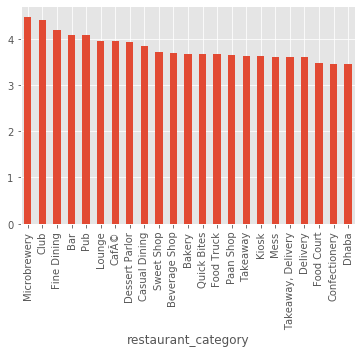

In [37]:
dfcatratings = df.groupby("restaurant_category")['rating'].mean()
dfcatratings.sort_values(ascending=False).plot.bar()

**Microbrewery and Club have the highest average rating while dhaba category has the lowest.** 

** **

<div class="span5 alert alert-info">
<b>    
7. To summarise,what is liked the most in top 2 restaurant categories.(Club, Microbreweries)
</b>    
</div>    

In [38]:
def combineFeatureText(series):
    text = []
    for i,row in series.iteritems():
        if type(row) is tuple:
            for k in row[1]:
                text.append(k)
                
    return text 

In [39]:
topCategories = ['Club','Microbrewery']
dfLikedInTopCat = df[df['restaurant_category'].isin(topCategories)]

In [40]:
dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])
mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText)
mostLikedFoodText

restaurant_category
Club            [Cocktails, Tandoori Chicken, Beer, Paneer Siz...
Microbrewery    [Cocktails, Pizza, Mocktails, Apple Cider, Per...
Name: most_liked_Food, dtype: object

In [41]:
dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])
mostLikedServiceText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Service'].agg(combineFeatureText)
mostLikedServiceText

restaurant_category
Club            [Courteous Staff, Friendly Staff, Prompt Servi...
Microbrewery    [Friendly Staff, Courteous Staff, Friendly Ser...
Name: most_liked_Service, dtype: object

In [42]:
dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])
mostLikedLooknFeelText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Look & Feel'].agg(combineFeatureText)
mostLikedLooknFeelText

restaurant_category
Club             [Dj, Dance Floor, Decor, Dj, Dance Floor, Decor]
Microbrewery    [Lovely Ambience, Decor, Dj, Lovely Ambience, ...
Name: most_liked_Look & Feel, dtype: object

In [43]:
mostLikedCombined = mostLikedFoodText + mostLikedServiceText + mostLikedLooknFeelText

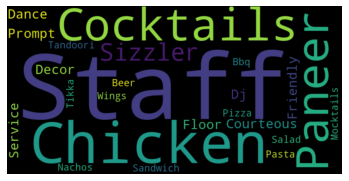

Cocktails Tandoori Chicken Beer Paneer Sizzler Chicken Sizzler Mocktails Nachos Cocktails Pizza Chicken Bbq Wings Salad Pasta Paneer Tikka Sandwich Courteous Staff Friendly Staff Prompt Service Courteous Staff Friendly Staff Prompt Service Dj Dance Floor Decor Dj Dance Floor Decor


In [44]:
liked_text = ' '.join(review for review in mostLikedCombined["Club"])

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(liked_text)

**In 'Club' restaurant category Chicken, Cocktails, Paneer are the most liked items/words in food.
Also Staff, friendly, Service have significant importance.** 

** **

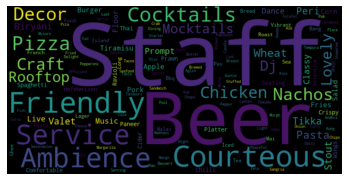

In [45]:
liked_text = ' '.join(review for review in mostLikedCombined["Microbrewery"])

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**In 'Microbrewery' restaurant category Staff, Friendly, Service, Courteous, Decor are most liked/important words. Beer, Cocktails, Pizza are important in food/drinks.** 

** **

<div class="span5 alert alert-info">
<b> 
8. Exploring most liked food,service,look and feel in a most common restaurant category of a high rated restaurants.
</b>    
</div>    

In [46]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat1 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat1[dfLikedInTopCat1['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])

mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText)

cuisines_series = mostLikedFoodText.apply(pd.Series).stack().reset_index(drop=True)
cuisines_series.value_counts(ascending = False)

Mocktails            67
Cocktails            65
Pasta                63
Fish                 52
Pizza                52
                     ..
Fish Finger           1
Chicken Chettinad     1
Chura Paratha         1
Chocolava             1
Thai Sticky Rice      1
Length: 543, dtype: int64

**Mocktails, Cocktails, Pasta, Pizza are some of the most liked food items in the most common categories(Quick bites,Casual Dining) which are highly rated(>4.2).** 

** **

In [47]:
topCategories = ['Quick bites','Casual Dining']
dfLikedInTopCat2 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat2[dfLikedInTopCat2['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])

mostLikedServicedText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Service'].agg(combineFeatureText)

service_series = mostLikedServicedText.apply(pd.Series).stack().reset_index(drop=True)
service_series.value_counts(ascending = False)

Friendly Staff       225
Courteous Staff      203
Prompt Service        86
Friendly Service      37
Courteous Service     36
Valet Service         29
Attentive Service      5
Cordial Staff          4
Efficient Service      3
Weekend Brunch         1
dtype: int64

**Friendly staff, Courteous staff are some of the most liked service in the most common categories(Quick bites,Casual Dining) which are highly rated(>4.2).** 

** **

In [48]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat3 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat3[dfLikedInTopCat3['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])

mostLikedlookFeelText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Look & Feel'].agg(combineFeatureText)

service_series = mostLikedlookFeelText.apply(pd.Series).stack().reset_index(drop=True)
service_series.value_counts(ascending = False)

Decor                   202
Lovely Ambience          34
Rooftop Ambience         27
Live Music               26
Comfortable Seating      25
Cozy Place               20
Calm                     16
Cozy Ambience            16
Dj                       13
Live Grill               12
Rooftop Setting          11
Romantic Dinner           9
Cozy                      8
Peaceful Ambience         6
Classy Ambience           6
Classy Place              5
Pool Table                4
Dance Floor               3
Vibrant Ambience          3
Candle Light Dinner       3
Calm Ambience             3
Live Cooking              2
Cute Ambience             2
Soothing Ambience         2
Dhaba Feel                2
Instrumental Music        2
Comfortable Sofas         2
Board Games               2
Outdoor Ambience          2
Wooden Decor              2
Chinese Ambience          2
Pirate Theme              1
Punjabi Ambience          1
Peaceful Vibe             1
Romantic Place            1
Rooftop View        

**Decor, Lovely Ambience are some of the most liked LooknFeel features in the most common categories(Quick bites,Casual Dining) which are highly rated(>4.2).** 

** **

<div class="span5 alert alert-info">
<b>    
9. Insight on how Zomato Gold affects ratings of a particular restaurant category in any locality
</b>    
</div>    

In [49]:
dfZomato = df[df["zomato_gold"] == 1].groupby(['locality','restaurant_category'])['rating'].mean()
dfZomato

locality       restaurant_category
BTM            Bar                    3.600000
               Casual Dining          4.150000
               Dessert Parlor         4.400000
Banashankari   Casual Dining          3.700000
               Lounge                 3.900000
                                        ...   
Whitefield     Pub                    4.200000
Wilson Garden  Casual Dining          3.900000
Yelahanka      Casual Dining          4.033333
Yeshwantpur    Bar                    3.700000
               Casual Dining          3.833333
Name: rating, Length: 155, dtype: float64

In [50]:
dfNoZomato = df[df["zomato_gold"] == 0].groupby(['locality','restaurant_category'])['rating'].mean()
dfNoZomato

locality     restaurant_category
BTM          Bakery                 3.660000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.784375
             Delivery               3.677778
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 791, dtype: float64

locality     restaurant_category
BTM          Bakery                 3.660000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.784375
             Delivery               3.677778
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 791, dtype: float64

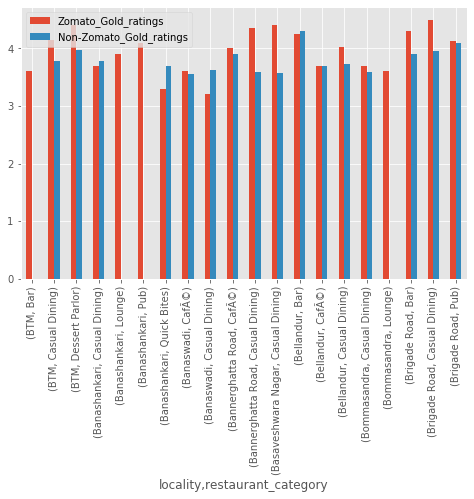

In [714]:
mergeddf = pd.merge(dfZomato,dfNoZomato,how ='left',on=['locality','restaurant_category'])
slicedMergeddf = mergeddf[0:20] #slice dataframe
ax = slicedMergeddf.plot.bar(figsize=(8,5))
ax.legend(["Zomato_Gold_ratings", "Non-Zomato_Gold_ratings"]);
dfNoZomato

**Considering a locality and restaurant category, most of the restaurants with zomato gold offers have better ratings on an average.**

** **

<div class="span5 alert alert-info">
<b>    
10. Insight on overall average rating of zomato and non zomato restaurants.
</b>    
</div>    

In [51]:
df[df["zomato_gold"] == 1]['rating'].mean()

4.107621951219517

In [52]:
df[df["zomato_gold"] == 0]['rating'].mean()

3.737020069808015

**Overall Zomato gold restaurant have a higher average rating.**

** **

<div class="span5 alert alert-info">
<b>    
11. Insight on Positive & negative sentiments on days of a week
</b>    
</div>    

In [53]:
df['reviews_new'] = df['reviews'].apply(ast.literal_eval)

In [54]:
review_series = df['reviews_new'].apply(pd.Series).stack().reset_index(drop=True)
review_series #each review has a date time,postive sentiment,negative sentiment,Text

0        [2019-05-20 21:52:52, NA, NA, Tasted their lyc...
1        [2019-03-30 09:42:49, NA, NA, Ambience - 3.5/5...
2        [2018-11-18 18:00:52, NA, NA, Ordered customis...
3        [2018-10-15 14:36:21, NA, NA, The best place f...
4        [2018-10-14 21:34:31, NA, NA, Booked for cake ...
                               ...                        
32930    [2019-07-26 10:54:53, NA, NA, Excellent baked ...
32931    [2016-06-18 01:04:31, NA, NA, This place has b...
32932    [2019-12-09 12:09:22, positive, negative, Food...
32933    [2019-10-31 13:54:14, positive, NA, Very econo...
32934    [2019-10-08 19:33:47, NA, negative, Ordered fo...
Length: 32935, dtype: object

In [56]:
p = [i[0:3] for i in review_series]

cols = ["ReviewDay","Positive sentiment","Negative sentiment"]
for i,obj in enumerate(p):
    obj[0] = datetime.strptime(obj[0], '%Y-%m-%d %H:%M:%S').strftime('%A') #date time to weekday


In [57]:
newDF = pd.DataFrame(p,columns=cols)
newDF.head()

,ReviewDay,Positive sentiment,Negative sentiment
0,Monday,NA,NA
1,Saturday,NA,NA
2,Sunday,NA,NA
3,Monday,NA,NA
4,Sunday,NA,NA


In [58]:
s = newDF.set_index("ReviewDay").unstack().reset_index()
df3 = s.set_axis(['sentiment', 'ReviewDay','sentimentVal'], axis=1, inplace=False)

In [59]:
df3 = df3[df3.sentimentVal != 'NA']
df4 = df3.groupby(['ReviewDay','sentimentVal']).count()
df4.head()

sentiment
ReviewDay sentimentVal           
Friday    negative            532
          positive           1838
Monday    negative            480
          positive           1780
Saturday  negative            668

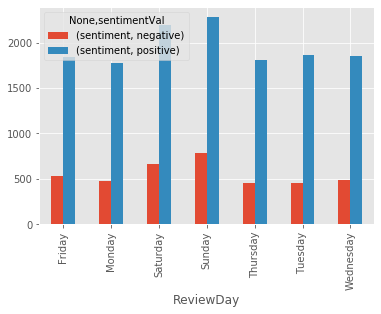

In [60]:
df4.unstack().plot(kind='bar')

**Overall there are more positive sentiments than negative,also weekends can relatively higher vote for sentiments.**

** **

<div class="span5 alert alert-info">
<b> 
Exploring correlations between variables.
</b>
</div>

Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new'],
      dtype='object')

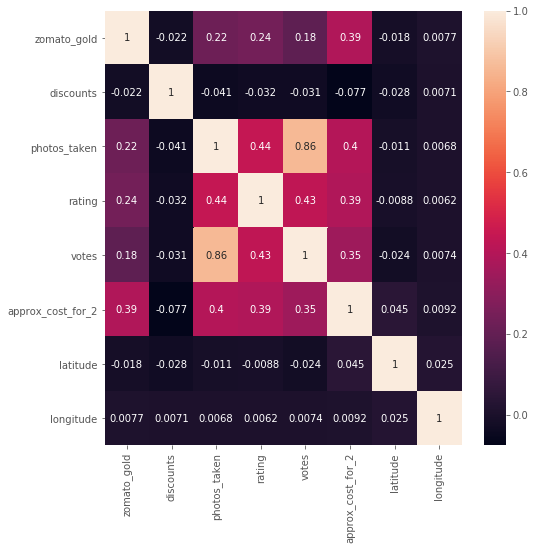

In [61]:
corr = df.corr(method='pearson')
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.columns

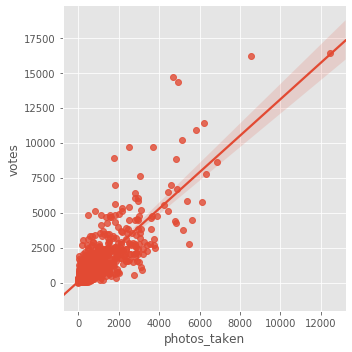

In [62]:
sns.lmplot('photos_taken','votes',data=df)

**Photos taken and votes have highest correlation.** 

<div class="span5 alert alert-info">
<b>
Converting features to numerical data for exploring more correlations.
</b>
</div>    

In [63]:
#Creating a new copy of dataframe

dfm = df.copy()
df.head()

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews,reviews_new
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18779047,https://www.zomato.com/bangalore/ammas-pastrie...,Amma's Pastries,JP Nagar,Dessert Parlor,0,0,4,3.7,21.0,[Desserts],...,12.896474,77.586202,"['Indoor Seating', 'Desserts and Bakes']",NaN,NaN,NaN,NaN,NaN,"(['2019-05-20 21:52:52', 'NA', 'NA', ""Tasted t...","([2019-05-20 21:52:52, NA, NA, Tasted their ly..."
57138,https://www.zomato.com/bangalore/asia-alive-do...,Asia Alive - DoubleTree Suites By Hilton,Sarjapur Road,Fine Dining,1,0,667,4.1,308.0,"[Continental, Thai, Malaysian, Burmese, Ko...",...,12.920216,77.665705,"['Breakfast', 'Wheelchair Accessible', 'Full B...",NaN,NaN,"(5/5, [Salad, Fish, Cocktails, Wine, Gulab Jam...","(4/5, [Friendly Staff])","(4/5, [Live Music, Decor])","(['2019-12-29 20:22:45', 'positive', 'NA', 'We...","([2019-12-29 20:22:45, positive, NA, Went for ..."
19265762,https://www.zomato.com/bangalore/dolphin-hotel...,Dolphin Hotel,Rajajinagar,Quick Bites,0,0,0,3.4,6.0,"[Andhra, Mughlai, Mangalorean]",...,12.989147,77.532875,"['Home Delivery', 'Indoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-12-07 19:25:04', 'positive', 'NA', '']...","([2019-12-07 19:25:04, positive, NA, ], [2019-..."
19185928,https://www.zomato.com/bangalore/chick-blast-b...,Chick Blast,Banaswadi,Quick Bites,0,0,19,3.6,15.0,"[Pizza, Sandwich, Wraps, Chinese, Ice Crea...",...,13.006791,77.659279,"['Outdoor Seating', 'Indoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-12-23 21:11:45', 'positive', 'NA', 'I ...","([2019-12-23 21:11:45, positive, NA, I have be..."
19196635,https://www.zomato.com/bangalore/cupcake-natio...,Cupcake Nation Studio,Koramangala 6th Block,Bakery,0,0,0,NaN,NaN,[Bakery],...,12.935047,77.623449,"['Takeaway Only', 'Standing Tables', 'Desserts...",NaN,NaN,NaN,NaN,NaN,"(['2020-01-01 13:00:17', 'positive', 'negative...","([2020-01-01 13:00:17, positive, negative, ],)"


In [777]:
#Adding some features

In [64]:
#encoding categorical variables

from sklearn import preprocessing

class Categorical_encoding:
    def __init__(self, df, categorical_features):
        self.df = df
        self.output_df = self.df.copy(deep=True)
        self.cat_features = categorical_features
        
        for c in self.cat_features:
            self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna(-1)
    
    def label_encoding(self):
        for c in self.cat_features:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
        
        return self.output_df

In [65]:
# grouping restaurant categories and localities having low count to a 'other' category

dfm['restaurant_category'] = dfm['restaurant_category'].mask(dfm['restaurant_category'].map(dfm['restaurant_category'].value_counts()) < 20,'Others')
dfm['locality'] = dfm['locality'].mask(dfm['locality'].map(dfm['locality'].value_counts()) < 20,'Others')

In [66]:
# Label encoding Locality and restaurant category

cols = ['locality','restaurant_category']        
o_df = Categorical_encoding(dfm,cols)  
dfm = o_df.label_encoding()

In [67]:
dfm["featured_in_count"] = dfm["featured_in"].apply(lambda x: len(ast.literal_eval(x)) if x is not np.nan else x)
dfm["featured_in_count"]

restaurant_ID
18779047    NaN
57138       NaN
19265762    NaN
19185928    NaN
19196635    NaN
           ... 
19292734    NaN
18932586    2.0
52097       2.0
18716061    NaN
19057947    NaN
Name: featured_in_count, Length: 5637, dtype: float64

In [68]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def LabelBinarizerEncoding(categoricalList,colSubset = []):
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(categoricalList),columns = mlb.classes_,index = categoricalList.index)
    return res


In [69]:
dfm["most_liked_Food"]

restaurant_ID
18779047                                                  NaN
57138       (5/5, [Salad, Fish, Cocktails, Wine, Gulab Jam...
19265762                                                  NaN
19185928                                                  NaN
19196635                                                  NaN
                                  ...                        
19292734                                                  NaN
18932586    (5/5, [Mocktails, Tiramisu, Pizza, Cheese Ball...
52097       (5/5, [Pizza, Coffee, Eclair, Oreo Cheesecake,...
18716061    (4/5, [Mocktails, Peri Fries, Lasagne, Paneer ...
19057947                                                  NaN
Name: most_liked_Food, Length: 5637, dtype: object

In [70]:
#Referring above analysis we have top categories

famousCuisines = ['Chinese','North Indian','South Indian','Fast Food']
famousMostLikedFood = ['Cocktails','Mocktails','Pizza','Pasta']
famousService = ['Friendly Staff','Courteous Staff']
famousLookFeel = ['Decor']

dfcuisinesbin = LabelBinarizerEncoding(dfm['cuisines'])
dfcuisinesbin_ = dfcuisinesbin[famousCuisines]

dfm["most_liked_Food"] = dfm["most_liked_Food"].apply(lambda x: x[1] if x is not np.nan else [])
dfostLikedFoodbin = LabelBinarizerEncoding(dfm['most_liked_Food'])
dfostLikedFoodbin_ = dfostLikedFoodbin[famousMostLikedFood]

dfm["most_liked_Service"] = dfm["most_liked_Service"].apply(lambda x: x[1] if x is not np.nan else [])
dfostLikedServicebin = LabelBinarizerEncoding(dfm['most_liked_Service'])
dfostLikedServicebin_ = dfostLikedServicebin[famousService]

dfm["most_liked_Look & Feel"] = dfm["most_liked_Look & Feel"].apply(lambda x: x[1] if x is not np.nan else [])
dfostLikedLookFeelbin = LabelBinarizerEncoding(dfm['most_liked_Look & Feel'])
dfostLikedLookFeelbin_ = dfostLikedLookFeelbin[famousLookFeel]


In [71]:
def addbinarisedCols(binariseddf,colsFilterList):
    for i in range(len(colsFilterList)):
        dfm[colsFilterList[i]] = binariseddf[colsFilterList[i]]

addbinarisedCols(dfcuisinesbin_,famousCuisines)
addbinarisedCols(dfostLikedFoodbin_,famousMostLikedFood)
addbinarisedCols(dfostLikedServicebin_,famousService)
addbinarisedCols(dfostLikedLookFeelbin_,famousLookFeel)

dfm.head(3)

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,North Indian,South Indian,Fast Food,Cocktails,Mocktails,Pizza,Pasta,Friendly Staff,Courteous Staff,Decor
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18779047,https://www.zomato.com/bangalore/ammas-pastrie...,Amma's Pastries,24,6,0,0,4,3.7,21.0,[Desserts],...,0,0,0,0,0,0,0,0,0,0
57138,https://www.zomato.com/bangalore/asia-alive-do...,Asia Alive - DoubleTree Suites By Hilton,61,7,1,0,667,4.1,308.0,"[Continental, Thai, Malaysian, Burmese, Ko...",...,0,0,0,1,0,0,0,1,0,1
19265762,https://www.zomato.com/bangalore/dolphin-hotel...,Dolphin Hotel,55,16,0,0,0,3.4,6.0,"[Andhra, Mughlai, Mangalorean]",...,0,0,0,0,0,0,0,0,0,0


Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new', 'featured_in_count', 'Chinese',
       'North Indian', 'South Indian', 'Fast Food', 'Cocktails', 'Mocktails',
       'Pizza', 'Pasta', 'Friendly Staff', 'Courteous Staff', 'Decor'],
      dtype='object')

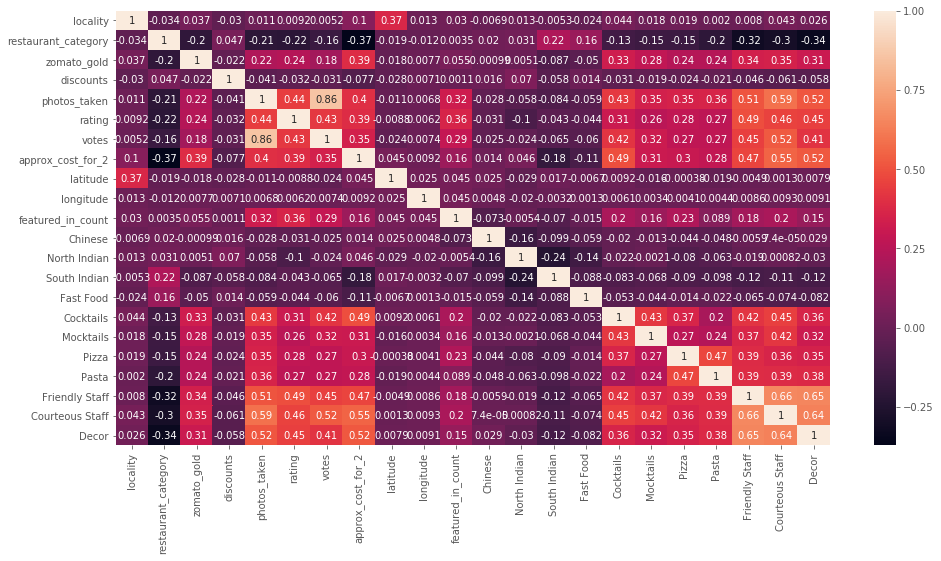

In [72]:
corr = dfm.corr(method='pearson')
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
dfm.columns

In [73]:
#for further analysis
dfm.to_csv("zomato_clean_data_csv/zomato_reduced_data"+".csv",index=False)

** **

<div class="span5 alert alert-info">
<b>
Summarising the insights:
</b>
</div>

<div class="span5 alert alert-info">
<b>
Insights from Descriptive Analysis:
</b>
</div>    

**1. Quick bites and Casual dining are the most common of all restaurant categories.**

**2. Singaporean,Indonesian are some of rare cuisines.**

**3. Indiranagar has the most restaurants featured under 'newly opened'.**

**4. Fine dining category has the highest cost for 2 people.**

**5. The average ratings of the restaurants vary based on the locality they are in, which indicates the correlation between them.**

**6. Microbrewery and Club have the highest average rating while dhaba category has the lowest.** 

**7. Mocktails,cocktails,pasta,friendly staff,courteous staff ,decor,lovely ambience,rooftop ambience are some of the most liked things in most common restaurant categories.**

**8. Paneer,Chicken,Sizzler,Staff,Peri,Service,Pizza,Ambience,Beer are some of the most liked things in top rated restaurant categories.**

**9. Considering a locality and restaurant category,mostly zomato gold restaurants have better ratings.**

**10. Overall zomato gold restaurants have better average ratings.**

**11. Overall there are more positive sentiments than negative,also weekends can relatively higher vote for sentiments.**


<div class="span5 alert alert-info">
<b>
Insights from correlations:
</b>
</div>    

**1. There is high positive correlation between photos_taken and votes.**

**2. Features like photos_taken,votes,approx_cost_for_2,featured_in_count,zomato_gold tend to have positive correlation with restaurant rating.**

**3. Discounts have a negative correlation with ratings.**  

For further statistical inference

https://github.com/Anandpatil412/DSC/blob/master/CapstoneProject1/Zomato/Statistical_Inference.ipynb